In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot  as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration  of the plots we will create

In [2]:
#Read in the data

df= pd.read_csv(r'C:\Users\rishi\OneDrive\Desktop\movies.csv')

In [3]:
#Lets look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
#lets see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [7]:
#Extracting the missing data

df = df.dropna()
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [8]:
#data typer for columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [9]:
#changing data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [53]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       230    7.8  1100000.0       785    1263   
7445   388       5      0  2019        78    8.4   903000.0       105     513   
3045  4909       5      6  1997       231    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       230    7.8   876000.0       768    1806   
7244   389       5      0  2018        82    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

In [54]:
df['released'] = df['released'].astype(str).str[:13]
df.head()

name  rating  genre  year released  score      votes  director  writer  \
5445   386       5      0  2009      230    7.8  1100000.0       785    1263   
7445   388       5      0  2019       78    8.4   903000.0       105     513   
3045  4909       5      6  1997      231    7.8  1100000.0       785    1263   
6663  3643       5      0  2015      230    7.8   876000.0       768    1806   
7244   389       5      0  2018       82    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

In [23]:
df = df.sort_values(['gross'], inplace = False, ascending = False)

In [16]:
pd.set_option('display.max_rows', None)

In [55]:
#drop if there is any duplicates

df.drop_duplicates().head()

name  rating  genre  year released  score      votes  director  writer  \
5445   386       5      0  2009      230    7.8  1100000.0       785    1263   
7445   388       5      0  2019       78    8.4   903000.0       105     513   
3045  4909       5      6  1997      231    7.8  1100000.0       785    1263   
6663  3643       5      0  2015      230    7.8   876000.0       768    1806   
7244   389       5      0  2018       82    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

In [ ]:
#budget high correlation
#budget high correlation

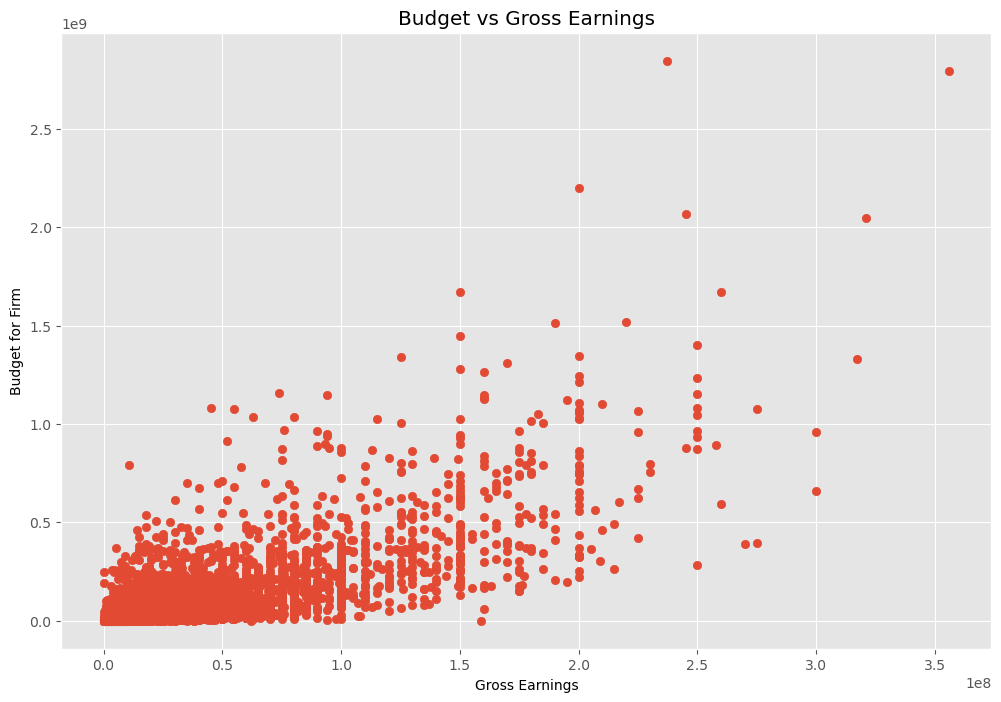

In [25]:
#scatter plot with buget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Firm')

plt.show()

In [46]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       230    7.8  1100000.0       785    1263   
7445   388       5      0  2019        78    8.4   903000.0       105     513   
3045  4909       5      6  1997       231    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       230    7.8   876000.0       768    1806   
7244   389       5      0  2018        82    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

<Axes: xlabel='budget', ylabel='gross'>

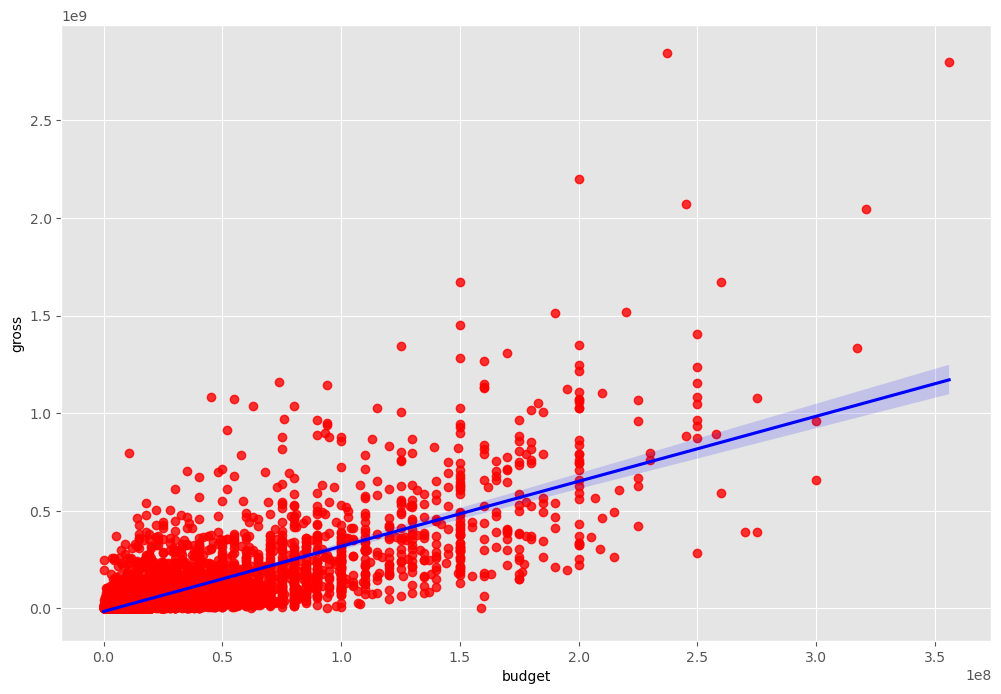

In [32]:
#plot the budget vs gross using seaborn

sns.regplot(x=df['budget'], y=df['gross'], scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [34]:
#lets start looking at the correlation

df.corr(method = 'pearson') #pearson, kendall, spearman

C:\Users\rishi\AppData\Local\Temp\ipykernel_13500\3889620620.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson') #pearson, kendall, spearman


year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

C:\Users\rishi\AppData\Local\Temp\ipykernel_13500\1633471431.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


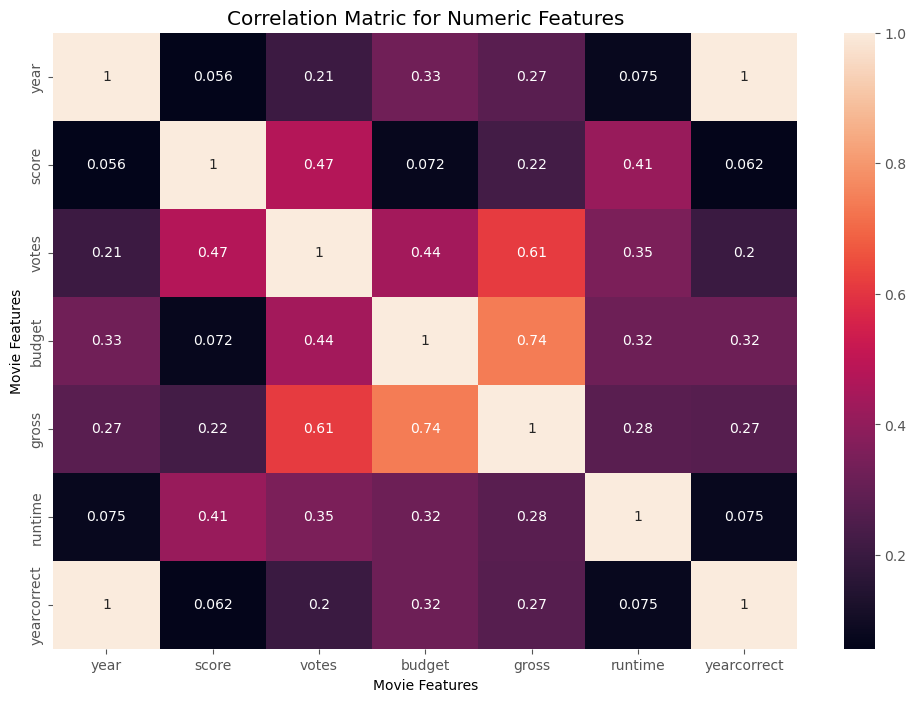

In [40]:
#High correlation between budget and gross

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [47]:
#looks at company

df1 = df
for col_name in df1.columns:
    if(df1[col_name].dtype == 'object'):
        df1[col_name] = df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes
df1

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       230    7.8  1100000.0       785    1263   
7445   388       5      0  2019        78    8.4   903000.0       105     513   
3045  4909       5      6  1997       231    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       230    7.8   876000.0       768    1806   
7244   389       5      0  2018        82    8.4   897000.0       105     513   
7480  4388       4      2  2019       450    6.9   222000.0      1012    1361   
6653  2117       5      0  2015       624    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1129    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015        96    7.1   370000.0       809     481   
7494  1530       4      2  2019      1176    6.8   148000.0       277    1383   
6644   387       5      0  2015       956    7.3   777000.0      1060    1646   
7247   567       5      0  2018       267    7.3   661000.0      1716    2687   
5845  1731       5      1  2011       417    8.1   790000.0       452    2862   
7075  3644       5      0  2017       227    7.0   581000.0      1589    2487   
7271  2118       5      0  2018       696    6.2   277000.0       764     777   
6262  1529       4      2  2013      1181    7.4   585000.0       277    1383   
7072   477       4      7  2017       846    7.1   283000.0       155    2822   
7281  1966       4      2  2018       644    7.6   263000.0       193     327   
7055  4119       5      0  2017        29    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1112    7.1   779000.0      1767     837   
6688  2545       4      2  2015       379    6.4   218000.0      1144     362   
6846   750       5      0  2016      1140    7.8   694000.0       105     513   
7250   343       5      0  2018       235    6.9   404000.0       809     699   
4245  4407       5      0  2003       229    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019       460    7.5   359000.0      1019     479   
7456   755       5      0  2019       941    6.8   478000.0        96     182   
5878  4950       5      0  2011       750    6.2   390000.0      1302     886   
6059  3498       5      0  2012      1198    7.7   642000.0      1732    2221   
6494  4949       5      0  2014       733    5.6   302000.0      1302     886   
2448  4388       1      2  1994       706    8.5   970000.0      1685    1206   
6047  4048       5      0  2012       468    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       234    6.5   394000.0       768     489   
7450  2091       6      5  2019      1250    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019       686    7.7   217000.0      1052    1525   
5685  4935       1      2  2010       661    8.2   776000.0      1162    1525   
4852  2985       5      0  2006       578    7.3   668000.0       674    2927   
6869  3260       5      0  2016       228    7.8   572000.0       615     492   
7481   206       4      1  2019      1073    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1039    6.6   492000.0      1635    2927   
7140  1102       4      2  2017       769    6.3   119000.0      1144     524   
2245  2115       5      0  1993       613    8.1   894000.0      1859    2070   
6908  1411       4      2  2016       656    7.3   250000.0        81     153   
3451  3637       4      0  1999      1017    6.5   748000.0       653    1046   
5667   215       4      1  2010       924    6.4   392000.0      1918    1849   
6863  5329       4      2  2016       919    8.0   450000.0       239     390   
6045  4240       5      1  2012       226    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1166    7.6   685000.0       280    1236   
5243  4047       5      0  2008       441    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

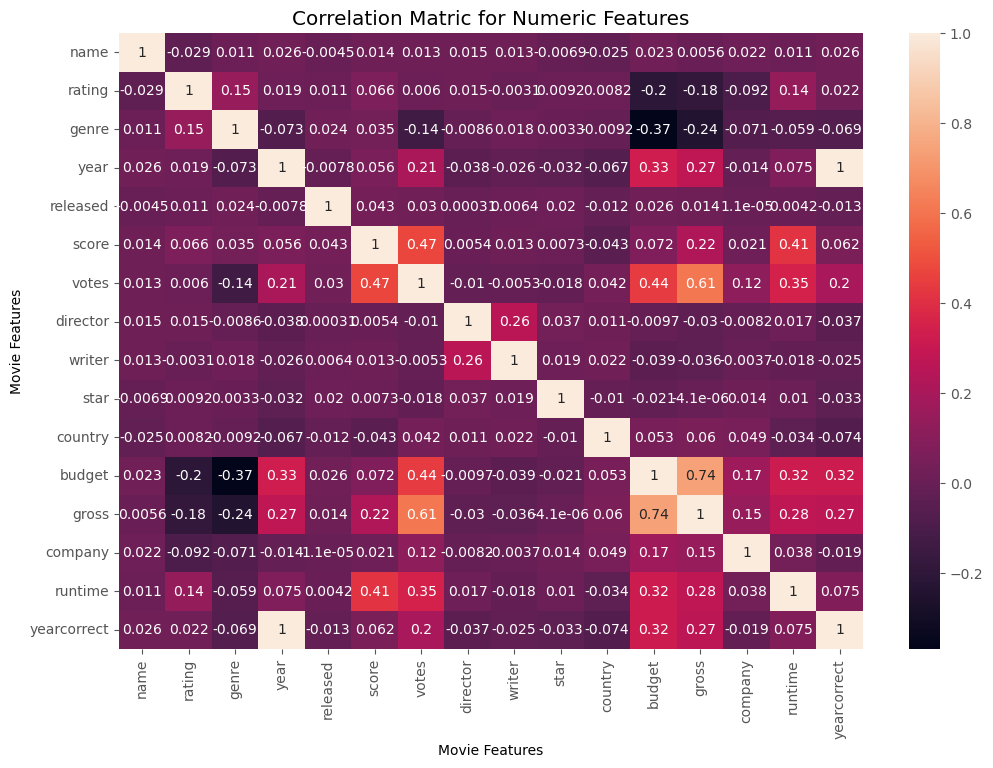

In [48]:
correlation_matrix = df1.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [56]:
df1.corr().head()

C:\Users\rishi\AppData\Local\Temp\ipykernel_13500\380908936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().head()


name    rating     genre      year     score     votes  director  \
name    1.000000 -0.029234  0.010996  0.025542  0.014450  0.012615  0.015246   
rating -0.029234  1.000000  0.147796  0.019499  0.065983  0.006031  0.014656   
genre   0.010996  0.147796  1.000000 -0.073167  0.035106 -0.135990 -0.008553   
year    0.025542  0.019499 -0.073167  1.000000  0.056386  0.206021 -0.038354   
score   0.014450  0.065983  0.035106  0.056386  1.000000  0.474256  0.005413   

          writer      star   country    budget     gross   company   runtime  \
name    0.012880 -0.006882 -0.025490  0.023392  0.005639  0.021697  0.010850   
rating -0.003149  0.009196  0.008230 -0.203946 -0.181906 -0.092357  0.140792   
genre   0.017578  0.003341 -0.009164 -0.368523 -0.244101 -0.071334 -0.059237   
year   -0.025908 -0.032157 -0.066748  0.327722  0.274321 -0.014333  0.075077   
score   0.012843  0.007296 -0.043051  0.072001  0.222556  0.020656  0.414068   

        yearcorrect  
name       0.025542  
rating     0.022021  
genre     -0.069147  
year       0.998726  
score      0.061923

In [57]:
correlation_mat = df1.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

C:\Users\rishi\AppData\Local\Temp\ipykernel_13500\800547362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df1.corr()


name  name      1.000000
      rating   -0.029234
      genre     0.010996
      year      0.025542
      score     0.014450
dtype: float64

In [58]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.368523
budget  genre    -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
rating  budget   -0.203946
dtype: float64

In [52]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#gross and votes have the highest correlation to gross earnings

#company has low correlation